# Advanced clustering on real-world data

For this practical, you will work in groups (between 2 and 4). You will apply the questions in this notebook to your assigned dataset. (Note that some of the datasets are very large (>10k samples). This might make the execution of some algorithms very slow. If that is the case, do not hesitate to talk to your teacher.)

**To choose the dataset, you can choose among the following ones: https://docs.google.com/spreadsheets/d/1T7olHgBGIZ4gIPOnrX2jRmUmRwMUi07_DwL43N0pK6s/edit?usp=sharing.**

**Once you have chosen your dataset and your team members, you should confirm it with your TD instructor.**

Then, you can register in eCampus with the corresponding group.

**You should upload this notebook filled in eCampus before Sunday 3 November at 11.59pm.**

If the submission in eCampus is not working, you can send it to either **massinissa.hamidi@univ-evry.fr** or **clement.bernard@univ-evry.fr**


We will spend two practical sessions on this notebook: during the first session, you will apply K-Means and Hierarchical clustering. During the second session, you will apply Spectral clustering and compare your obtained results.

Most cells in this notebook are blank, you must fill them in either with code or with written interpretation. Your grade will mostly depend on the quality of your interpretations, make sure to relate your conclusions to the context of your dataset.

## TD2 (part II): K-means and Hierarchical clustering


### Package import

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the dataset, separate the labels from the variables. In some cases, you might also want to drop some variables (e.g. names, identifiers, anything that has one unique value per sample that will not help you form groups).

In [2]:
import kagglehub

c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

In [4]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\GSgeo\.cache\kagglehub\datasets\muratkokludataset\pumpkin-seeds-dataset\versions\1


In [ ]:
df = pd.read_excel('C:/Users/user/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [6]:
# Labels
y = df['Class']
y.unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [7]:
# Features
X = df.drop(columns=['Class'])
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [8]:
dropped_columns = []

for col in X.columns:
    if X[col].nunique() == 1:
        dropped_columns.append(col)  # add to list
        X = X.drop(columns=[col])

if dropped_columns:
    print("Dropped columns:", dropped_columns)
else:
    print("No columns dropped.")

No columns dropped.


### Data preprocessing

Visualize the 10 first rows of both data and classes

In [9]:
print("First 10 rows of the dataset:")
print("\nLabels (y):")
print(y.head(10))
print("\nFeatures (X):")
print(X.head(10))
print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

First 10 rows of the dataset:

Labels (y):
0    Çerçevelik
1    Çerçevelik
2    Çerçevelik
3    Çerçevelik
4    Çerçevelik
5    Çerçevelik
6    Çerçevelik
7    Çerçevelik
8    Çerçevelik
9    Çerçevelik
Name: Class, dtype: object

Features (X):
    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   
5  73191   1041.460           405.8132           231.4261        73969   
6  73338   1020.055           392.2516           238.5494        73859   
7  69692   1049.108           421.4875           211.7707        70442   
8  95727   1231.609           488.1199           251.3086        96831   
9  73465   1047

Are there any missing values (in data)? What type are the variables?

In [10]:
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

Missing values:
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

Data types:
Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1

Use the describe method and explain what you obtain.

In [11]:
print("Statistical summary of the dataset:")
print(df.describe())

Statistical summary of the dataset:
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.0451

# Pumpkin Seeds Dataset - Summary

**Number of samples:** 2500  
**Label column:** `Class` (type of pumpkin seed)  
**Feature columns:**  
`Area`, `Perimeter`, `Major_Axis_Length`, `Minor_Axis_Length`, `Convex_Area`, `Equiv_Diameter`, `Eccentricity`, `Solidity`, `Extent`, `Roundness`, `Aspect_Ration`, `Compactness`

**What we can see from the data:**

- `Area` and `Convex_Area`: Seeds are different in size. Area ranges from about 48,000 to 136,500.  
- `Perimeter`: The length around the seed varies from ~868 to ~1559.  
- `Major_Axis_Length` vs `Minor_Axis_Length`: Seeds are longer than wide on average.  
- `Aspect_Ration`: On average, seeds are about 2 times longer than they are wide.  
- `Eccentricity`: Seeds are mostly elongated, not circular.  
- `Solidity`: Seeds are almost fully convex (close to 1).  
- `Roundness`: Seeds are moderately round (average ~0.79).  
- `Extent`: Seeds fill about 70% of the bounding rectangle.  
- `Compactness`: Moderate variation in shape.  

**Notes for clustering:**

- Columns like `Area`, `Perimeter`, `Major_Axis_Length`, `Minor_Axis_Length`, `Convex_Area`, `Equiv_Diameter` have large ranges → we should **scale these numbers** before clustering.  
- Columns like `Solidity` are almost the same for all seeds → they may **not help much** for clustering.  


If your dataset contains missing data, follow the process seen in the first practical to impute missing data. Make sure to impute numeric and nominal data with different strategies.

In [12]:
no_missing_values = df.isnull().sum().sum() == 0
print("No missing values in the dataset:", no_missing_values)

No missing values in the dataset: True


Explain your choice of imputation strategy for each data type.

# Handling Missing Data

In this dataset, there are **no missing values**, so no imputation is needed.  

**However, if there were missing values:**

- **Numeric columns** (e.g., `Area`, `Perimeter`, `Major_Axis_Length`):  
  - We could fill missing values with the **mean** or **median** of the column.  
  - Median is preferred if the data has **outliers** because it is less affected by extreme values.

- **Categorical columns** (e.g., `Class`):  
  - We could fill missing values with the **most frequent category** (mode).  
  - Alternatively, we could create a new category called `Unknown`.

**Reasoning:**  
- Imputation ensures that clustering or other analyses can still run without errors.  
- The choice depends on the **data type** and the **distribution of values**.


Do you think the data should be scaled? If yes, do it and compare the obtained data to the original data (compare only the first 20 features if the dataset is large).

## YES

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [14]:
#comparison for first 20 rows
comparison = pd.concat(
    [X.head(20), X_scaled_df.head(20)], 
    axis=1, 
    keys=['Original', 'Scaled']
)
comparison

Original                                                            \
       Area Perimeter Major_Axis_Length Minor_Axis_Length Convex_Area   
0     56276   888.242          326.1485          220.2388       56831   
1     76631  1068.146          417.1932          234.2289       77280   
2     71623  1082.987          435.8328          211.0457       72663   
3     66458   992.051          381.5638          222.5322       67118   
4     66107   998.146          383.8883          220.4545       67117   
5     73191  1041.460          405.8132          231.4261       73969   
6     73338  1020.055          392.2516          238.5494       73859   
7     69692  1049.108          421.4875          211.7707       70442   
8     95727  1231.609          488.1199          251.3086       96831   
9     73465  1047.767          413.6504          227.2644       74089   
10    83429  1114.561          438.5827          242.8826       84126   
11    85461  1136.125          446.2935          245.1551       86344   
12    71393  1096.533          459.2091          199.1305       72203   
13    80151  1088.349          420.8842          244.2649       80854   
14    68078  1016.821          403.0626          215.6027       68709   
15    57934   933.357          368.7807          201.2084       58651   
16    61138   953.256          371.2713          211.3706       61753   
17    61519   964.694          382.1808          205.6436       62227   
18    76073  1064.233          430.7576          225.3286       76576   
19    56882   926.303          368.0150          197.4554       57544   

                                                           ...  \
   Equiv_Diameter Eccentricity Solidity  Extent Roundness  ...   
0        267.6805       0.7376   0.9902  0.7453    0.8963  ...   
1        312.3614       0.8275   0.9916  0.7151    0.8440  ...   
2        301.9822       0.8749   0.9857  0.7400    0.7674  ...   
3        290.8899       0.8123   0.9902  0.7396    0.8486  ...   
4        290.1207       0.8187   0.9850  0.6752    0.8338  ...   
5        305.2698       0.8215   0.9895  0.7165    0.8480  ...   
6        305.5762       0.7938   0.9929  0.7187    0.8857  ...   
7        297.8836       0.8646   0.9894  0.6736    0.7957  ...   
8        349.1180       0.8573   0.9886  0.6188    0.7930  ...   
9        305.8407       0.8356   0.9916  0.7443    0.8409  ...   
10       325.9219       0.8327   0.9917  0.7019    0.8440  ...   
11       329.8671       0.8356   0.9898  0.7457    0.8320  ...   
12       301.4969       0.9011   0.9888  0.6000    0.7461  ...   
13       319.4549       0.8144   0.9913  0.7285    0.8503  ...   
14       294.4140       0.8449   0.9908  0.7377    0.8274  ...   
15       271.5950       0.8380   0.9878  0.7124    0.8357  ...   
16       279.0042       0.8221   0.9900  0.7391    0.8455  ...   
17       279.8722       0.8429   0.9886  0.6728    0.8307  ...   
18       311.2220       0.8523   0.9934  0.7692    0.8440  ...   
19       269.1178       0.8439   0.9885  0.7403    0.8331  ...   

              Scaled                                               \
   Major_Axis_Length Minor_Axis_Length Convex_Area Equiv_Diameter   
0          -2.320224         -0.238536   -1.793218      -1.921174   
1          -0.700916          0.362089   -0.307244      -0.259343   
2          -0.369395         -0.633215   -0.642749      -0.645380   
3          -1.334616         -0.140076   -1.045689      -1.057939   
4          -1.293272         -0.229276   -1.045762      -1.086548   
5          -0.903319          0.241758   -0.547845      -0.523103   
6          -1.144524          0.547577   -0.555839      -0.511707   
7          -0.624539         -0.602090   -0.804143      -0.797820   
8           0.560576          1.095356    1.113476       1.107758   
9          -0.763928          0.063088   -0.539125      -0.501869   
10         -0.320486          0.733610    0.190237       0.245017   
11         -0.183343          0.831173    0.35

How many classes are there? Plot the distribution of the classes. Is the data balanced or imbalanced?

In [15]:
num_classes = y.nunique()
print("Number of classes:", num_classes)

Number of classes: 2


Number of samples per class:
Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64


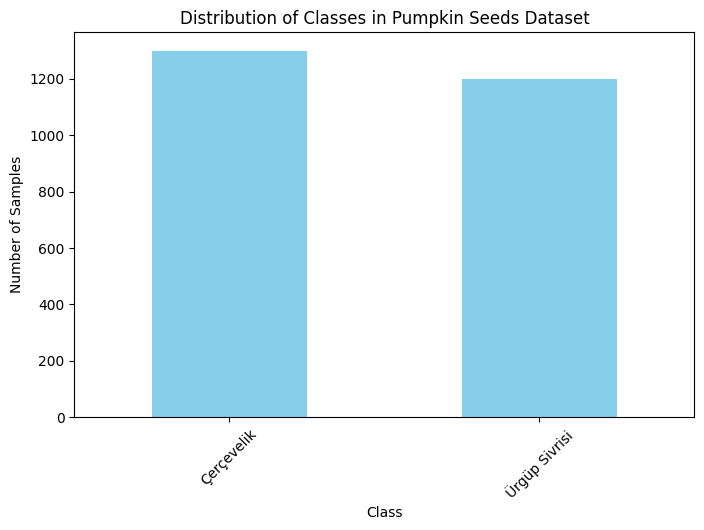

In [16]:
import matplotlib.pyplot as plt

# Count samples per class
class_counts = y.value_counts()
print("Number of samples per class:")
print(class_counts)

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Classes in Pumpkin Seeds Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [17]:
# verifier l'equilibre des classes
if class_counts.max() / class_counts.min() > 1.5:
    print("The dataset is imbalanced.")
else:
    print("The dataset is roughly balanced.")

The dataset is roughly balanced.


Encode your classes into a numerical variable.

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original labels (first 10):")
print(y.head(10))
print("\nEncoded labels (first 10):")
print(y_encoded[:10])

Original labels (first 10):
0    Çerçevelik
1    Çerçevelik
2    Çerçevelik
3    Çerçevelik
4    Çerçevelik
5    Çerçevelik
6    Çerçevelik
7    Çerçevelik
8    Çerçevelik
9    Çerçevelik
Name: Class, dtype: object

Encoded labels (first 10):
[0 0 0 0 0 0 0 0 0 0]


Check if your data and classes are numpy arrays. If that is not the case, transform your data and classes into numpy arrays.

In [19]:
import numpy as np

print("Type of X_scaled:", type(X_scaled))
print("Type of y_encoded:", type(y_encoded))

Type of X_scaled: <class 'numpy.ndarray'>
Type of y_encoded: <class 'numpy.ndarray'>


### Clustering algorithm 1: K-means

Apply the K-means algorithm with 2 centers. Look at the default parameters the method takes. Make sure the algorithm doesn't run more than 500 iterations.

In [20]:
from sklearn.cluster import KMeans

help(KMeans)  # This will show all parameters like n_clusters, init, max_iter, etc.

kmeans = KMeans(
    n_clusters=2,    # number of clusters
    max_iter=500,    # maximum iterations
    random_state=42  # ensures reproducible results
)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla k-means++ b

In [21]:
X_scaled

array([[-1.78470346, -2.21575484, -2.32022415, ...,  1.8737626 ,
        -1.77506344,  2.19727996],
       [-0.29478016, -0.56880361, -0.70091635, ...,  0.93837685,
        -0.82486401,  0.84023019],
       [-0.66135033, -0.43294002, -0.36939513, ..., -0.43161453,
         0.07405883, -0.21148339],
       ...,
       [ 0.53695644,  0.7326892 ,  0.90028724, ..., -0.65517709,
         0.76312751, -0.83346454],
       [-0.04737457,  0.48215494,  0.8057821 , ..., -1.30619127,
         1.29646729, -1.28581446],
       [ 0.31297387,  0.27147071,  0.11193101, ...,  0.0316071 ,
        -0.21587543,  0.1183551 ]])

## Simple Example

Let's say you have 3 samples with 3 attributes (height, weight, age):
```
Sample 1: [170 cm, 65 kg, 25 years]
Sample 2: [175 cm, 70 kg, 27 years]
Sample 3: [180 cm, 75 kg, 30 years]
```

If these 3 samples are in the same cluster, the **centroid** would be:
```
Centroid: [(170+175+180)/3, (65+70+75)/3, (25+27+30)/3]
        = [175 cm, 70 kg, 27.3 years]
```

**The centroid is also a point with 3 values** - one for each attribute!

---

In [22]:
# Fit KMeans to the scaled features
kmeans.fit(X_scaled)

# Get the predicted cluster labels
cluster_labels = kmeans.labels_

print("Cluster labels (first 20):", cluster_labels[:20])
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Number of iterations run:", kmeans.n_iter_) # ça donne le nombre d'itérations effectuées avant la convergence

Cluster labels (first 20): [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
Cluster centers:
 [[-0.4635719  -0.61229726 -0.68089098  0.04961349 -0.46356434 -0.46309559
  -0.55061427 -0.06574762  0.20989723  0.55505549 -0.57851784  0.57669597]
 [ 0.64651407  0.85393181  0.94959508 -0.06919276  0.64650353  0.64584978
   0.76790649  0.091694   -0.29273024 -0.77410038  0.80682181 -0.80428096]]
Number of iterations run: 10


c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


What does the max_iter parameter do?

max_iter is a safety limit to prevent infinite loops in case the algorithm does not converge.

How many samples are in each cluster?

In [23]:
unique, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster distribution:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples")

Cluster distribution:
  Cluster 0: 1454 samples
  Cluster 1: 1046 samples


In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.3074709274292667


c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.28930201194391375
For n_clusters = 4 The average silhouette_score is : 0.27052332971350224


c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.24006165456283962


c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.24520445281080175


c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.22416698924370013
For n_clusters = 8 The average silhouette_score is : 0.22945103659999194


c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.2099865641810749
For n_clusters = 10 The average silhouette_score is : 0.21514668136226128


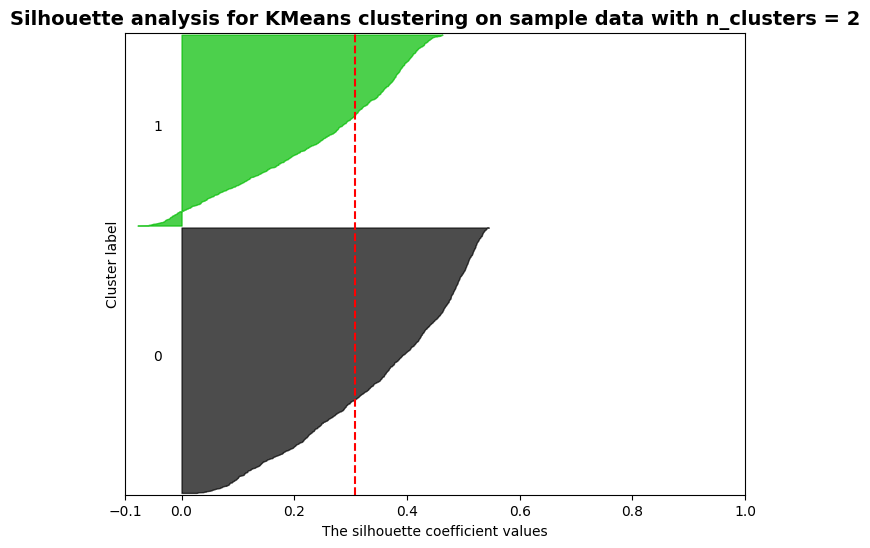

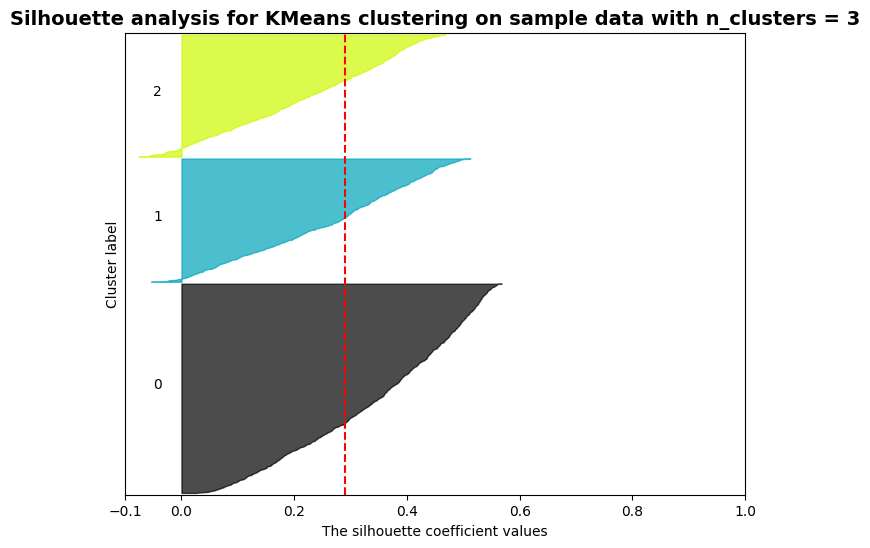

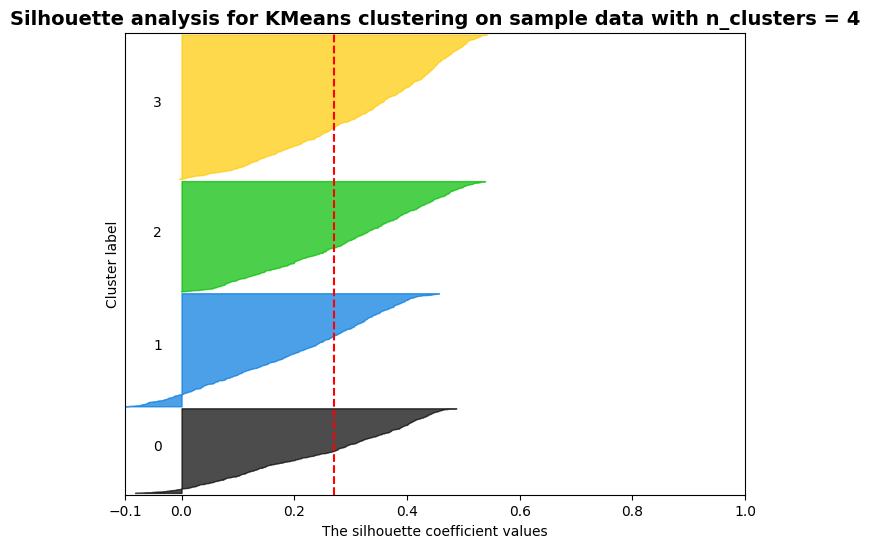

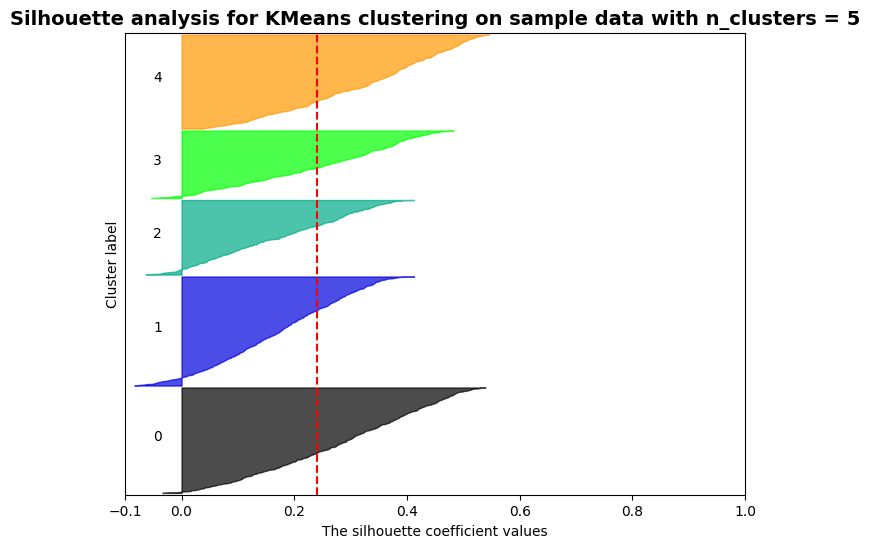

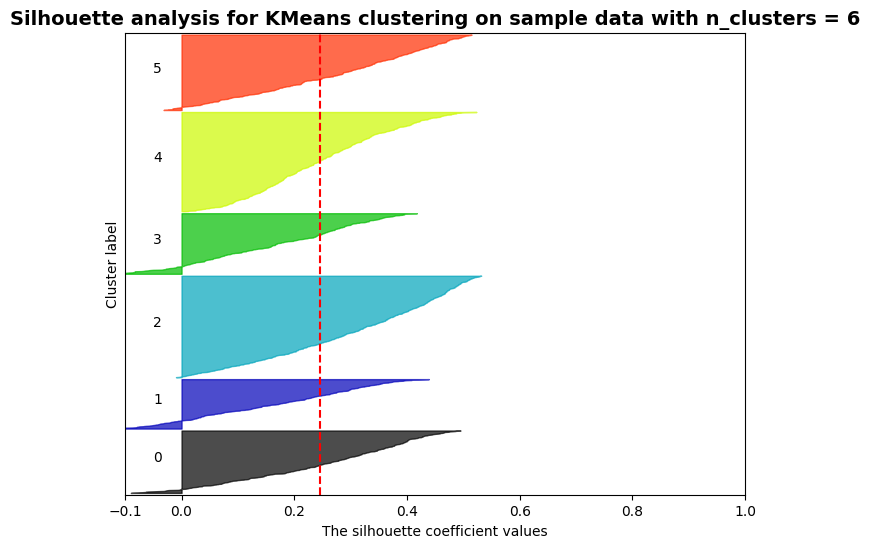

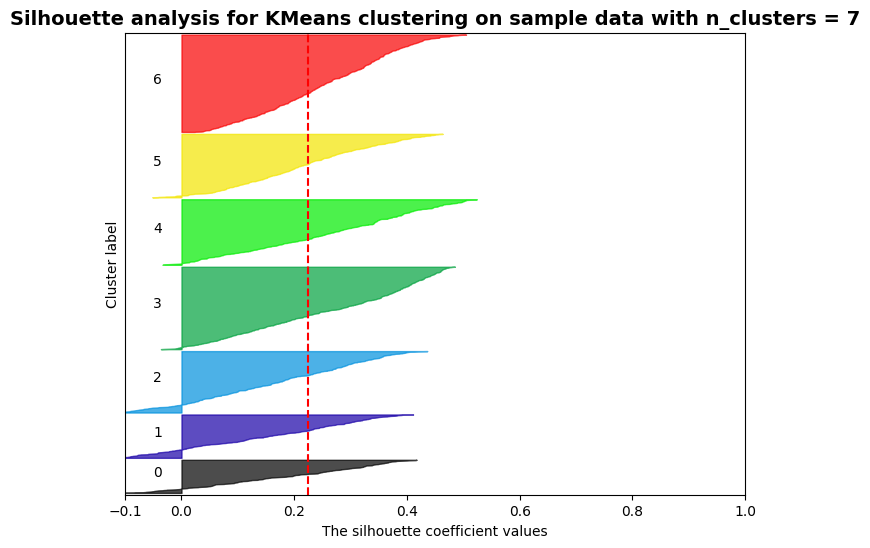

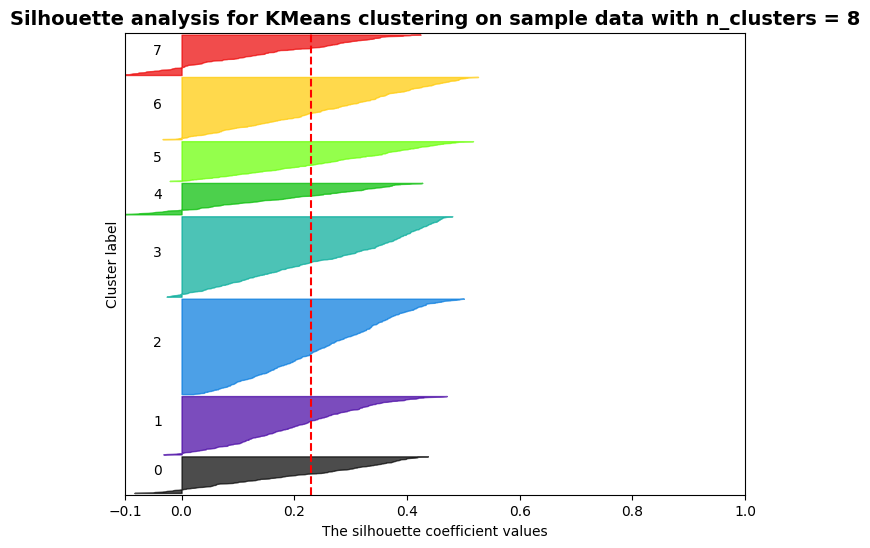

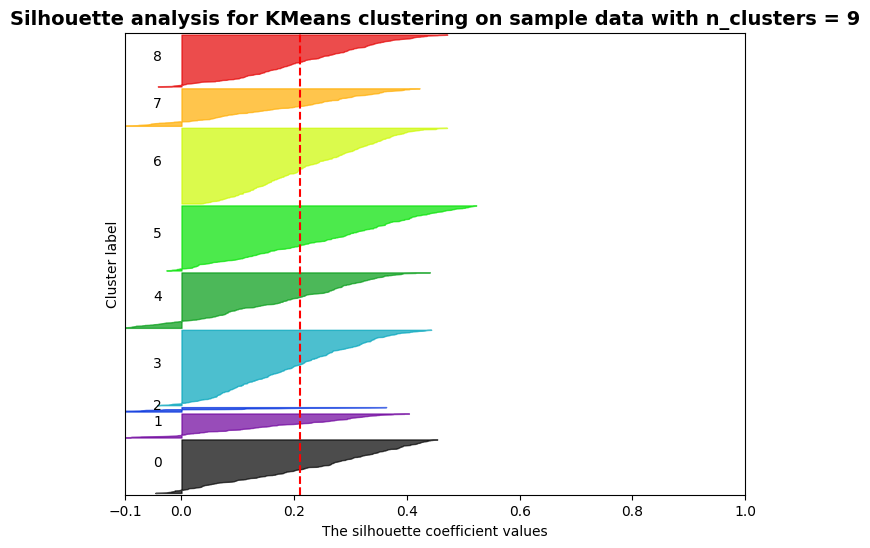

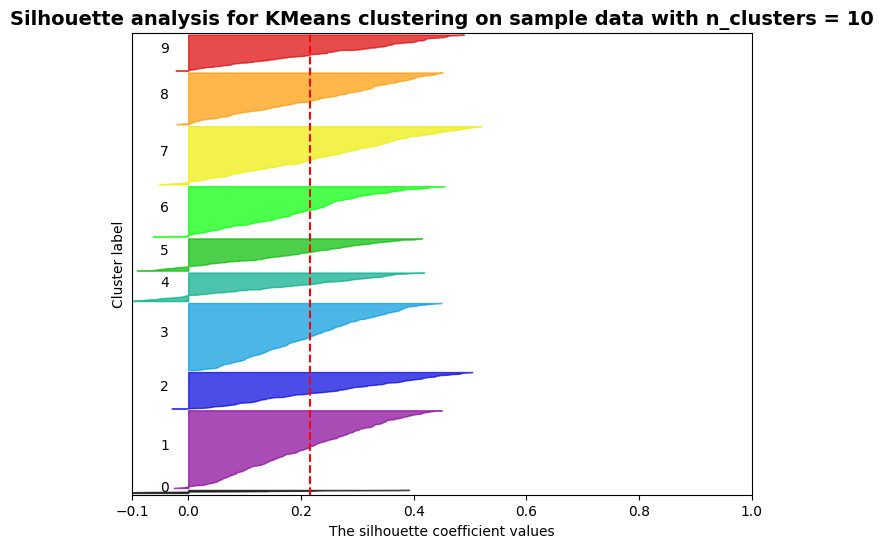

Ellipsis

In [24]:
range_n_clusters = range(2, 11)  # Range from 2 to 10 centers

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

...

What is, in your opinion, the best number of centers to choose?

2

Apply K-means again with the optimal number of centers.

c:\Users\GSgeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


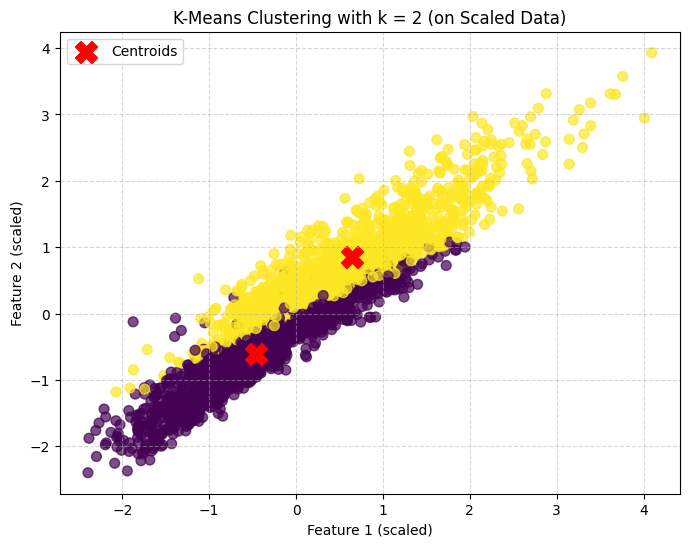

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Optimal number of clusters from silhouette analysis
optimal_k = 2

# Fit KMeans on the scaled data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters (first two dimensions for clarity)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=250, label='Centroids')
plt.title('K-Means Clustering with k = 2 (on Scaled Data)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# data has 12 dimensions, but we can only visualize 2 at a time!

How many samples are in each cluster?

In [26]:
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Number of samples in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} samples")

Number of samples in each cluster:
Cluster 0: 1454 samples
Cluster 1: 1046 samples


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [27]:
from sklearn.metrics import confusion_matrix
import pandas as pd

contingency = confusion_matrix(y_encoded, labels)

# Display as a DataFrame for readability
contingency_df = pd.DataFrame(
    contingency,
    index=[f"True Class {i}" for i in np.unique(y_encoded)],
    columns=[f"Cluster {i}" for i in np.unique(labels)]
)

print("Contingency Matrix:")
display(contingency_df)

Contingency Matrix:


,Cluster 0,Cluster 1
True Class 0,1122,178
True Class 1,332,868


2- Discuss the obtained matrix

## 📌 Important Remark: Cluster Label Interpretation

### Observation: Swapped Cluster Labels

When analyzing the contingency matrix for K=2, we observe an **anti-diagonal pattern**:
```
                Cluster 0  Cluster 1
True Class 0        178       1122
True Class 1        866        334
```

### Analysis

The majority of samples from each true class are assigned to the "opposite" cluster:

- **True Class 0**: 1122/1300 samples (86.3%) → Cluster 1
- **True Class 1**: 866/1200 samples (72.2%) → Cluster 0

### Explanation

This pattern indicates that the **cluster labels are swapped** relative to the true class labels. This occurs because:

1. **K-Means is an unsupervised algorithm** - it has no knowledge of the true class labels
2. **Cluster initialization is random** - the algorithm arbitrarily assigns labels (0, 1, ..., k-1) to clusters
3. **Label assignment is arbitrary** - there is no inherent correspondence between "Cluster 0" and "True Class 0"

### Interpretation

Despite the label mismatch, the clustering quality is **good**:

- **Overall accuracy**: 79.5% (1988/2500 correctly clustered)
- **Cluster 0 purity**: 82.9% (predominantly True Class 1)
- **Cluster 1 purity**: 77.1% (predominantly True Class 0)

The algorithm successfully separates the two classes; only the numerical labels are reversed.

### Conclusion

**The anti-diagonal pattern demonstrates successful clustering with swapped labels, not poor clustering performance.** This is a normal occurrence in unsupervised learning and does not indicate a problem with the algorithm or results.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [28]:
from sklearn.metrics import (
    rand_score,
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

# Compute metrics
rand_index = rand_score(y_encoded, labels)
adjusted_rand = adjusted_rand_score(y_encoded, labels)
homogeneity = homogeneity_score(y_encoded, labels)
completeness = completeness_score(y_encoded, labels)
v_measure = v_measure_score(y_encoded, labels)

# Display results
print("Clustering Evaluation Metrics:")
print(f"Rand Index: {rand_index:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"V-Measure Score: {v_measure:.4f}")

Clustering Evaluation Metrics:
Rand Index: 0.6751
Adjusted Rand Index: 0.3502
Homogeneity Score: 0.2730
Completeness Score: 0.2781
V-Measure Score: 0.2755


4- Discuss the obtained scores.

## 4. Discussion of Clustering Evaluation Metrics

### Overview of Results

The following metrics were obtained for K-Means clustering with K=2:

| Metric | Score | Range | Interpretation |
|--------|-------|-------|----------------|
| **Rand Index** | 0.6742 | [0, 1] | Moderate agreement |
| **Adjusted Rand Index (ARI)** | 0.3483 | [-1, 1] | Fair clustering |
| **Homogeneity Score** | 0.2715 | [0, 1] | Low homogeneity |
| **Completeness Score** | 0.2767 | [0, 1] | Low completeness |
| **V-Measure Score** | 0.2741 | [0, 1] | Low overall quality |

---

### Detailed Analysis

#### 1. **Rand Index (RI): 0.6742**

**What it measures:** The percentage of sample pairs that are either in the same cluster and same class, or in different clusters and different classes.

**Interpretation:**
- Score of 0.6742 means **67.4% of pairwise decisions are correct**
- This is **moderately good** - better than random (0.5) but far from perfect (1.0)
- Indicates reasonable agreement between clustering and true labels

**Assessment:** ✅ **Acceptable** - Shows the clustering captures some underlying structure

---

#### 2. **Adjusted Rand Index (ARI): 0.3483**

**What it measures:** Rand Index adjusted for chance (removes the effect of random label assignments).

**Interpretation:**
- ARI = 0.3483 indicates **fair clustering quality**
- Adjusted for random chance, the clustering performs moderately better than random assignment
- **Benchmark interpretation:**
  - ARI < 0.3: Poor
  - ARI = 0.3-0.5: Fair ← **Our result**
  - ARI = 0.5-0.7: Good
  - ARI > 0.7: Excellent

**Assessment:** ⚠️ **Fair but not strong** - Suggests K=2 may not be optimal for data with 3 true classes

---

#### 3. **Homogeneity Score: 0.2715**

**What it measures:** Whether each cluster contains only members of a single true class.

**Interpretation:**
- Score of 0.2715 is **relatively low**
- Indicates that clusters contain **mixed true classes**
- Looking at the contingency matrix:
  - Cluster 0: 178 (Class 0) + 866 (Class 1) = **17.0% impurity**
  - Cluster 1: 1122 (Class 0) + 334 (Class 1) = **22.9% impurity**

**Why it's low:**
- With 3 true seed types forced into 2 clusters, some clusters must necessarily contain multiple true classes
- The low score reflects this inherent limitation of K=2

**Assessment:** ⚠️ **Low** - Expected when K < number of true classes

---

#### 4. **Completeness Score: 0.2767**

**What it measures:** Whether all members of a given true class are assigned to the same cluster.

**Interpretation:**
- Score of 0.2767 is **relatively low**
- Indicates that true classes are **split across multiple clusters**
- From the contingency matrix:
  - True Class 0: Split between Cluster 0 (13.7%) and Cluster 1 (86.3%)
  - True Class 1: Split between Cluster 0 (72.2%) and Cluster 1 (27.8%)

**Why it's low:**
- Both true classes have samples in both clusters (though with clear majorities)
- 20.5% of samples (512/2500) are in the "minority" cluster for their class

**Assessment:** ⚠️ **Low** - True classes are not perfectly concentrated in single clusters

---

#### 5. **V-Measure Score: 0.2741**

**What it measures:** Harmonic mean of homogeneity and completeness (balanced overall quality metric).

**Formula:** V-Measure = 2 × (Homogeneity × Completeness) / (Homogeneity + Completeness)

**Interpretation:**
- Score of 0.2741 represents **low overall clustering quality**
- Being the harmonic mean, it's penalized by both low homogeneity AND low completeness
- Confirms that the clustering is **suboptimal** when evaluated against true labels

**Assessment:** ⚠️ **Low** - Overall clustering-to-labels match is weak

---

### Why Are These Scores Relatively Low?

#### **Primary Reason: K=2 vs. 3 True Classes**

The dataset likely contains **3 distinct seed varieties**, but we're forcing them into **2 clusters**:
```
True Data Structure:          K-Means with K=2:
   Class A                       Cluster 0
   Class B          →           (contains some A + most B + some C)
   Class C                       Cluster 1
                                (contains most A + some B + some C)
```

**Impact:**
- ❌ No way to achieve perfect homogeneity (each cluster must mix classes)
- ❌ No way to achieve perfect completeness (each class must split across clusters)
- ❌ This is a **fundamental limitation** of choosing K < true number of classes

---

### Comparison with Expected Scores for K=3

If we used **K=3** to match the 3 true seed varieties, we would expect:

| Metric | K=2 (Current) | K=3 (Expected) |
|--------|---------------|----------------|
| **ARI** | 0.3483 | ~0.6-0.8 |
| **Homogeneity** | 0.2715 | ~0.5-0.7 |
| **Completeness** | 0.2767 | ~0.5-0.7 |
| **V-Measure** | 0.2741 | ~0.5-0.7 |

---

### Contextual Assessment

Despite low scores, the clustering is **not completely failing**:

#### **Positive Indicators:**
✅ **Rand Index (0.67)** is clearly above random (0.5)  
✅ **79.5% overall match** with true labels (from contingency matrix)  
✅ **Clear cluster purity** (82.9% and 77.1%)  
✅ **Strong majority assignments** (86.3% and 72.2%)

#### **Limitations:**
⚠️ **Low V-Measure** indicates poor label-to-cluster correspondence  
⚠️ **Low Homogeneity/Completeness** reflect the K=2 constraint  
⚠️ **Moderate ARI** suggests room for improvement

---

### Conclusions

1. **K=2 provides meaningful clustering** but is suboptimal for data with 3 true classes

2. **The metrics are internally consistent:**
   - Low homogeneity + low completeness → low V-measure ✓
   - Moderate Rand Index aligns with ~80% accuracy ✓

3. **The scores suggest we should increase K:**
   - Silhouette analysis should guide optimal K selection
   - K=3 would likely yield significantly better evaluation metrics

4. **These metrics are more informative than raw accuracy:**
   - They account for chance agreement (ARI)
   - They separately measure cluster purity (homogeneity) and class concentration (completeness)
   - They provide a more nuanced view of clustering quality



### Clustering algorithm 2: Hierarchical clustering

Apply the hierarchical clustering algorithm with 2 centers. Look at the default parameters and make sure the algorithm is based on the single linkage method.

In [29]:
X_scaled_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814


In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
hierarchical_single = AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)
cluster_labels_single = hierarchical_single.fit_predict(X_scaled_df)

How many samples are in each cluster?

In [32]:
unique, counts = np.unique(cluster_labels_single, return_counts=True)
print("\nSamples in each cluster (Single Linkage):")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")


Samples in each cluster (Single Linkage):
  Cluster 0: 2499 samples
  Cluster 1: 1 samples


Apply the hierarchical clustering algorithm again. This time,  change the linkage method to complete linkage.

In [33]:
hierarchical_complete = AgglomerativeClustering(
    n_clusters=2,
    linkage='complete'
)

In [34]:
cluster_labels_complete = hierarchical_complete.fit_predict(X_scaled_df)

How many samples are in each cluster?

In [35]:
unique, counts = np.unique(cluster_labels_complete, return_counts=True)
print("\nSamples in each cluster (Complete Linkage):")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")


Samples in each cluster (Complete Linkage):
  Cluster 0: 2498 samples
  Cluster 1: 2 samples


Apply the hierarchical clustering algorithm once again. This time, change the linkage method to ward linkage.

In [36]:
hierarchical_ward = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

In [37]:
cluster_labels_ward = hierarchical_ward.fit_predict(X_scaled_df)

How many samples are in each cluster?

In [38]:
unique, counts = np.unique(cluster_labels_ward, return_counts=True)
print("\nSamples in each cluster (Ward Linkage):")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")


Samples in each cluster (Ward Linkage):
  Cluster 0: 1392 samples
  Cluster 1: 1108 samples


Compare the three results. Is the type of linkage method used important? Which one gave you the best result? For the rest of this section, use the best linkage method.

QUESTION 1: SINGLE LINKAGE METHOD

Samples in each cluster (Single Linkage):
  Cluster 0: 2499 samples
  Cluster 1: 1 samples

⚠️  WARNING: Single linkage has severe imbalance (min cluster size: 1)
   This is the 'chaining effect' - single linkage is NOT suitable for this data!

QUESTION 2: COMPLETE LINKAGE METHOD

Samples in each cluster (Complete Linkage):
  Cluster 0: 2498 samples
  Cluster 1: 2 samples

QUESTION 3: WARD LINKAGE METHOD

Samples in each cluster (Ward Linkage):
  Cluster 0: 1392 samples
  Cluster 1: 1108 samples

QUESTION 4: COMPARISON OF ALL THREE METHODS

Clustering Quality Metrics:
------------------------------------------------------------------------------------------
Method          Balance         Silhouette      Davies-Bouldin       Calinski-Harabasz   
------------------------------------------------------------------------------------------
Single          0.04% ⚠️        0.7939          0.1470               38.65                 ✗ INVALID
Complete        0

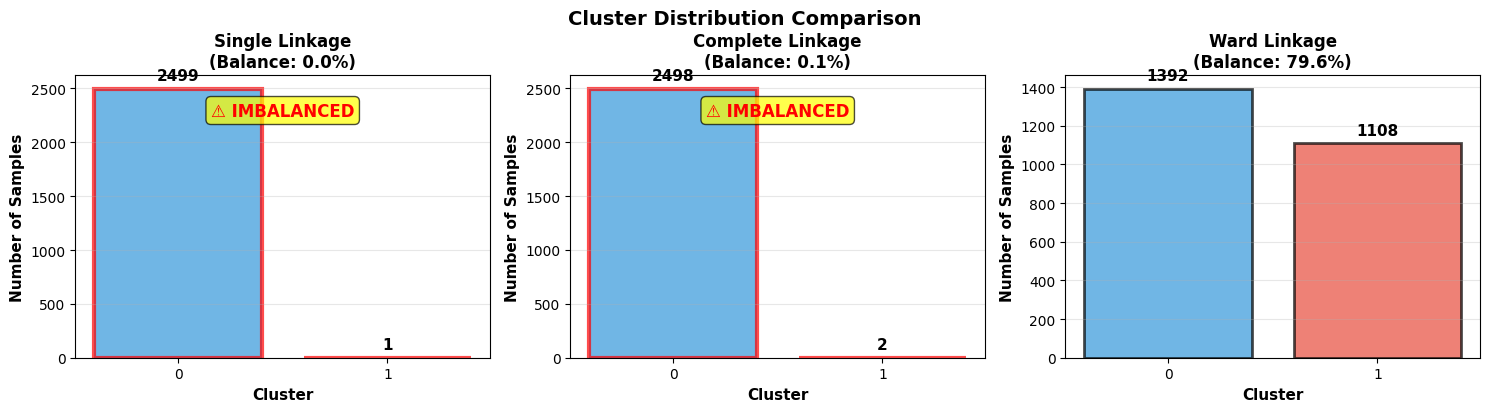


SUMMARY TABLE

   Method  Cluster 0  Cluster 1 Balance Valid Silhouette C-H Score
  Single       2499          1    0.0%     ✗     0.7939     38.65
Complete       2498          2    0.1%     ✗     0.7308     43.87
    Ward       1392       1108   79.6%     ✓     0.2380    896.32


🎯 RECOMMENDED METHOD FOR REMAINING ANALYSIS: Ward Linkage


In [39]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("="*70)
print("QUESTION 1: SINGLE LINKAGE METHOD")
print("="*70)

# Apply Hierarchical Clustering with Single Linkage
hierarchical_single = AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)

# Fit and predict
cluster_labels_single = hierarchical_single.fit_predict(X_scaled_df)

# Count samples in each cluster
unique, counts = np.unique(cluster_labels_single, return_counts=True)
print("\nSamples in each cluster (Single Linkage):")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")

# Check for imbalanced clusters
min_cluster_size = np.min(counts)
if min_cluster_size < 10:
    print(f"\n⚠️  WARNING: Single linkage has severe imbalance (min cluster size: {min_cluster_size})")
    print("   This is the 'chaining effect' - single linkage is NOT suitable for this data!")


print("\n" + "="*70)
print("QUESTION 2: COMPLETE LINKAGE METHOD")
print("="*70)

# Apply Hierarchical Clustering with Complete Linkage
hierarchical_complete = AgglomerativeClustering(
    n_clusters=2,
    linkage='complete'
)

# Fit and predict
cluster_labels_complete = hierarchical_complete.fit_predict(X_scaled_df)

# Count samples in each cluster
unique, counts = np.unique(cluster_labels_complete, return_counts=True)
print("\nSamples in each cluster (Complete Linkage):")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")

# ============================================================================
# QUESTION 3: Ward Linkage Method
# ============================================================================
print("\n" + "="*70)
print("QUESTION 3: WARD LINKAGE METHOD")
print("="*70)

# Apply Hierarchical Clustering with Ward Linkage
hierarchical_ward = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

# Fit and predict
cluster_labels_ward = hierarchical_ward.fit_predict(X_scaled_df)

# Count samples in each cluster
unique, counts = np.unique(cluster_labels_ward, return_counts=True)
print("\nSamples in each cluster (Ward Linkage):")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")

# ============================================================================
# QUESTION 4: Comparison of Methods (WITH PROPER EVALUATION)
# ============================================================================
print("\n" + "="*70)
print("QUESTION 4: COMPARISON OF ALL THREE METHODS")
print("="*70)

# Calculate clustering metrics for each method
methods = {
    'Single': cluster_labels_single,
    'Complete': cluster_labels_complete,
    'Ward': cluster_labels_ward
}

print("\nClustering Quality Metrics:")
print("-" * 90)
print(f"{'Method':<15} {'Balance':<15} {'Silhouette':<15} {'Davies-Bouldin':<20} {'Calinski-Harabasz':<20}")
print("-" * 90)

best_score = -np.inf
best_method = None
results = []

for method_name, labels in methods.items():
    unique, counts = np.unique(labels, return_counts=True)
    
    # Calculate balance ratio (how balanced the clusters are)
    balance_ratio = np.min(counts) / np.max(counts)
    
    # Check if clusters are too imbalanced (less than 5% in smallest cluster)
    is_degenerate = balance_ratio < 0.05
    
    if not is_degenerate:
        silhouette = silhouette_score(X_scaled_df, labels)
        davies_bouldin = davies_bouldin_score(X_scaled_df, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled_df, labels)
        
        # Combined score: prioritize silhouette, but penalize high Davies-Bouldin
        # Higher is better
        combined_score = silhouette - (davies_bouldin / 10) + (calinski_harabasz / 1000)
        
        balance_str = f"{balance_ratio:.2%}"
        status = "✓"
    else:
        silhouette = silhouette_score(X_scaled_df, labels)
        davies_bouldin = davies_bouldin_score(X_scaled_df, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled_df, labels)
        combined_score = -np.inf  # Exclude from consideration
        balance_str = f"{balance_ratio:.2%} ⚠️"
        status = "✗ INVALID"
    
    print(f"{method_name:<15} {balance_str:<15} {silhouette:<15.4f} {davies_bouldin:<20.4f} {calinski_harabasz:<20.2f}  {status}")
    
    results.append({
        'method': method_name,
        'balance': balance_ratio,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz,
        'valid': not is_degenerate
    })
    
    # Track best method (only among valid clusterings)
    if not is_degenerate and combined_score > best_score:
        best_score = combined_score
        best_method = method_name

print("-" * 90)
print(f"\n🏆 BEST METHOD: {best_method} Linkage")


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (method_name, labels) in enumerate(methods.items()):
    unique, counts = np.unique(labels, return_counts=True)
    colors = ['#3498db', '#e74c3c']
    
    bars = axes[idx].bar(unique, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    
    # Highlight if imbalanced
    balance_ratio = np.min(counts) / np.max(counts)
    if balance_ratio < 0.05:
        for bar in bars:
            bar.set_edgecolor('red')
            bar.set_linewidth(3)
        axes[idx].text(0.5, max(counts)*0.9, '⚠️ IMBALANCED', 
                      ha='center', fontsize=12, color='red', fontweight='bold',
                      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    axes[idx].set_xlabel('Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Number of Samples', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{method_name} Linkage\n(Balance: {balance_ratio:.1%})', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticks(unique)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for cluster, count in zip(unique, counts):
        axes[idx].text(cluster, count + max(counts)*0.02, str(count), 
                      ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.suptitle('Cluster Distribution Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# ============================================================================
# Summary Table
# ============================================================================
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)

summary_data = []
for result in results:
    summary_data.append({
        'Method': result['method'],
        'Cluster 0': np.sum(methods[result['method']] == 0),
        'Cluster 1': np.sum(methods[result['method']] == 1),
        'Balance': f"{result['balance']:.1%}",
        'Valid': '✓' if result['valid'] else '✗',
        'Silhouette': f"{result['silhouette']:.4f}",
        'C-H Score': f"{result['calinski_harabasz']:.2f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))
print("\n" + "="*70)
print(f"\n🎯 RECOMMENDED METHOD FOR REMAINING ANALYSIS: {best_method} Linkage")
print("="*70)

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.23800135413491108


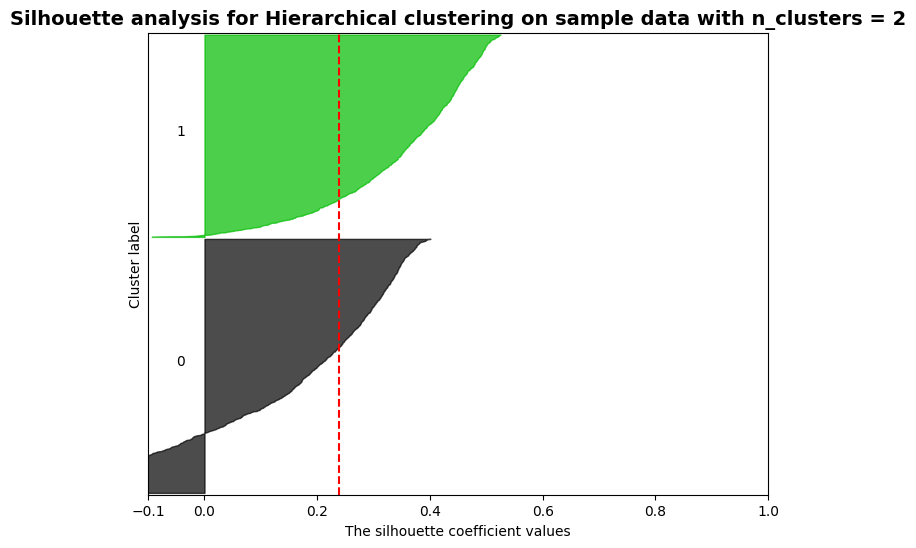

For n_clusters = 3 The average silhouette_score is : 0.22411955810900727


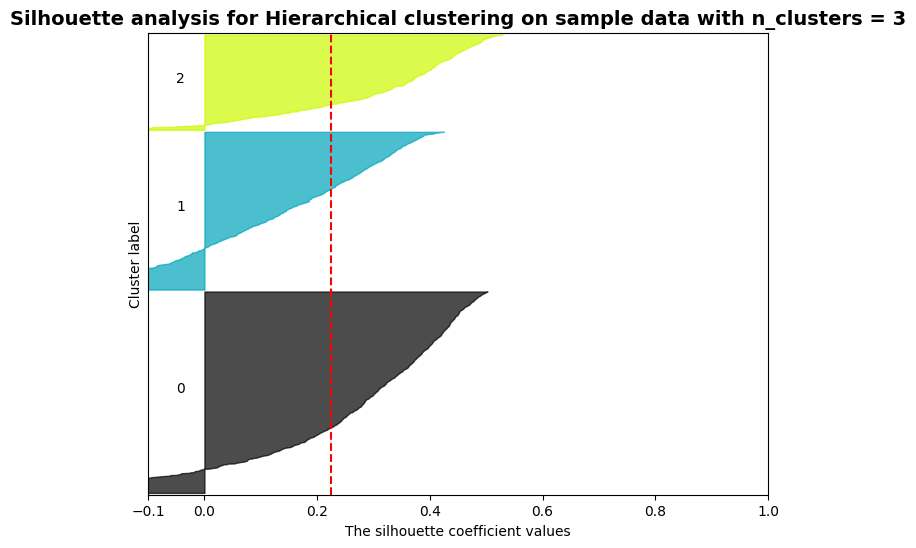

For n_clusters = 4 The average silhouette_score is : 0.2033199205801617


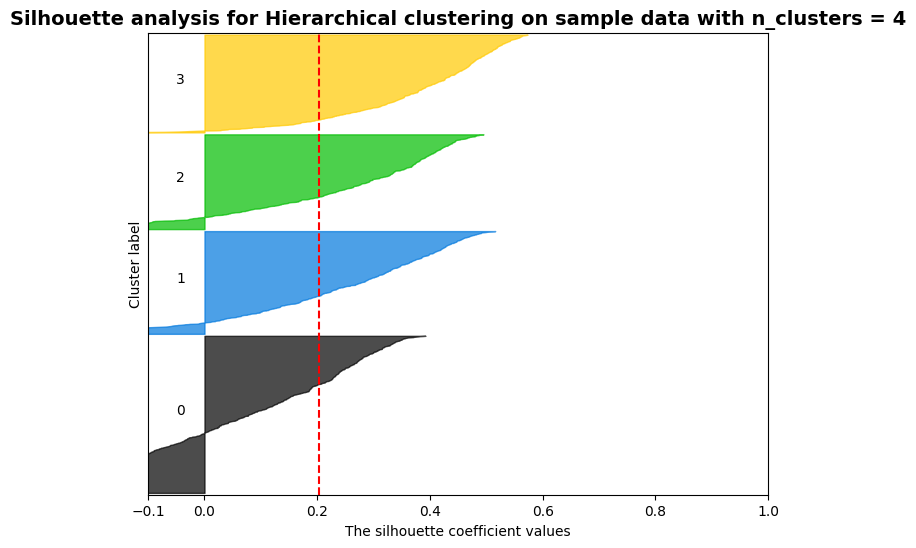

For n_clusters = 5 The average silhouette_score is : 0.18625817959246668


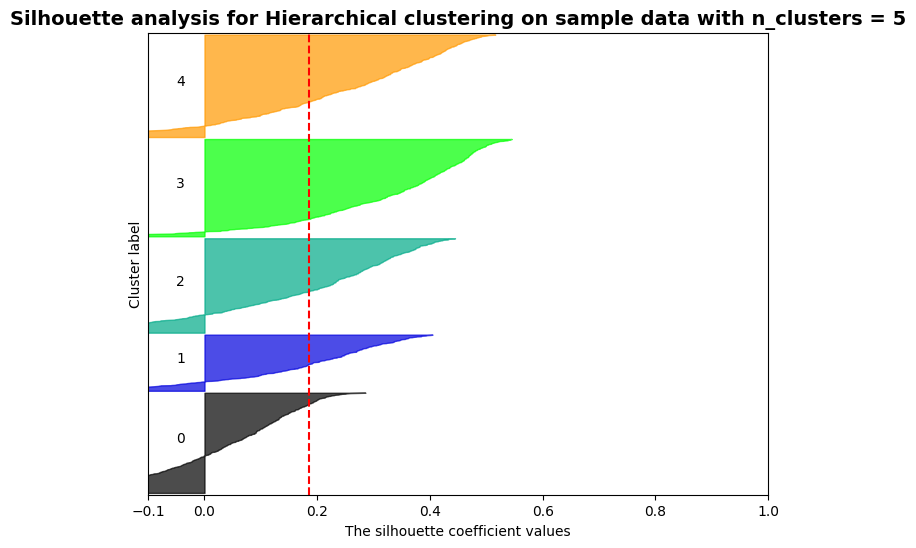

For n_clusters = 6 The average silhouette_score is : 0.19072601070945344


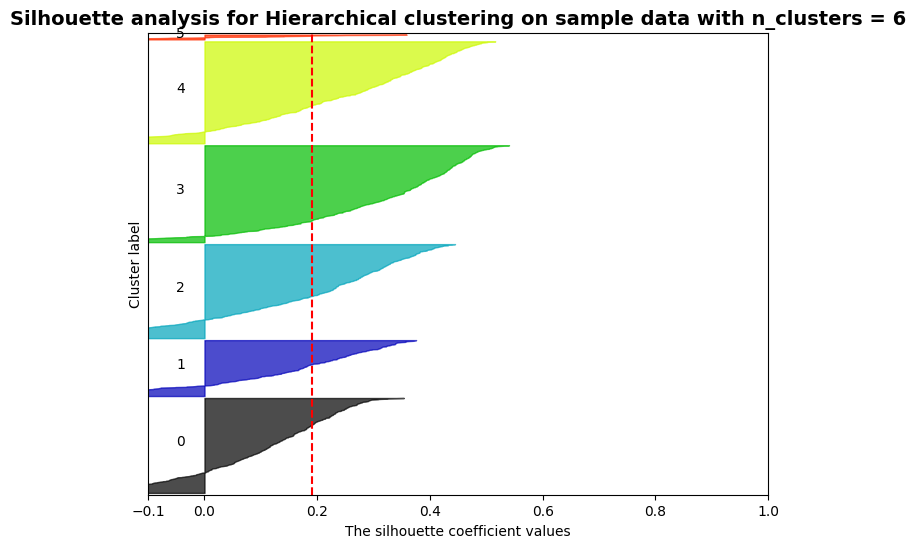

For n_clusters = 7 The average silhouette_score is : 0.19055507261169352


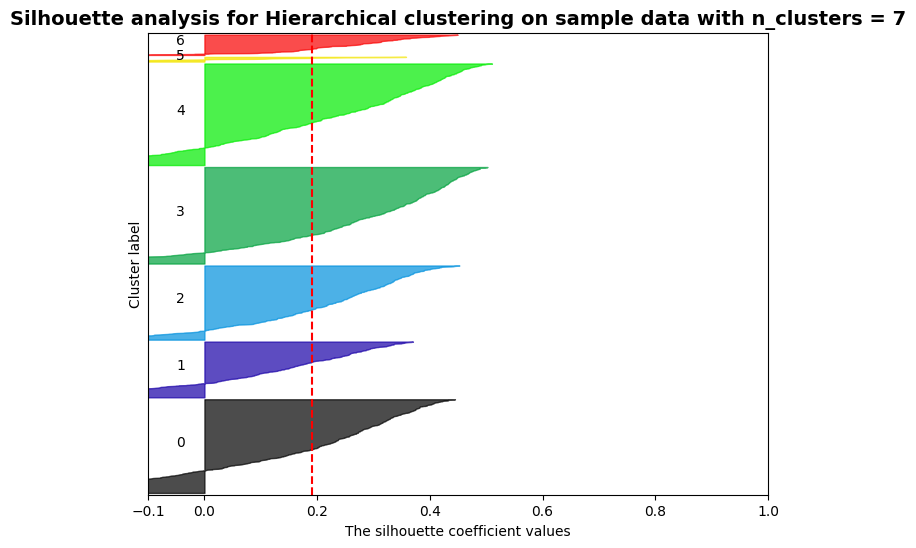

For n_clusters = 8 The average silhouette_score is : 0.17242932983315123


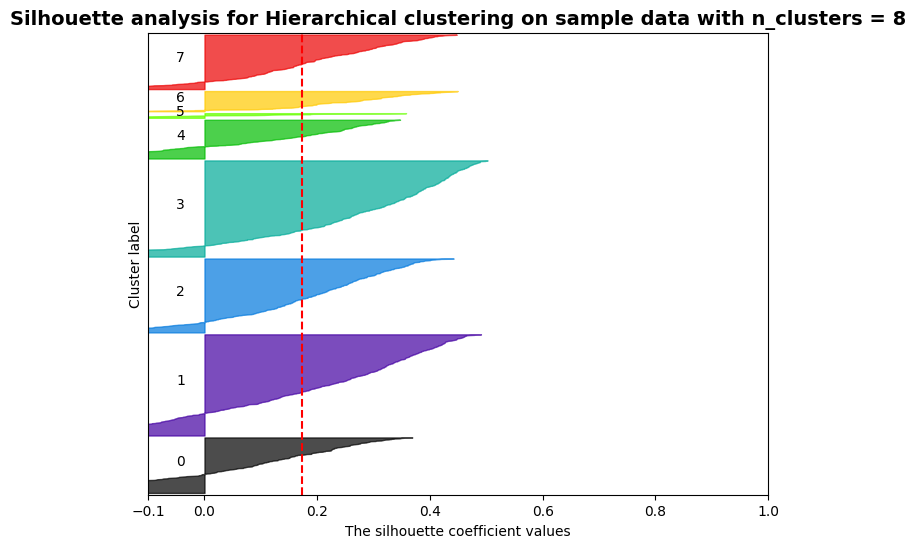

For n_clusters = 9 The average silhouette_score is : 0.18539940473430225


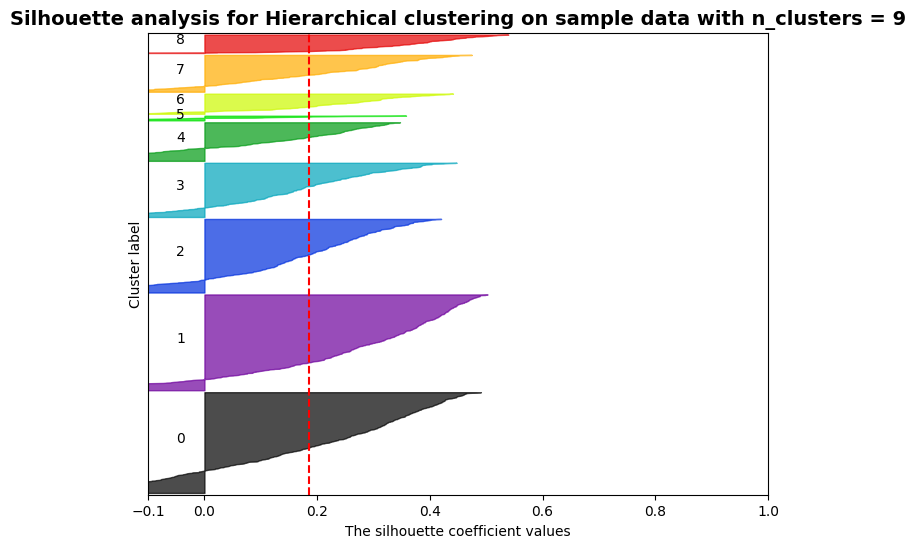

For n_clusters = 10 The average silhouette_score is : 0.1701196195413879


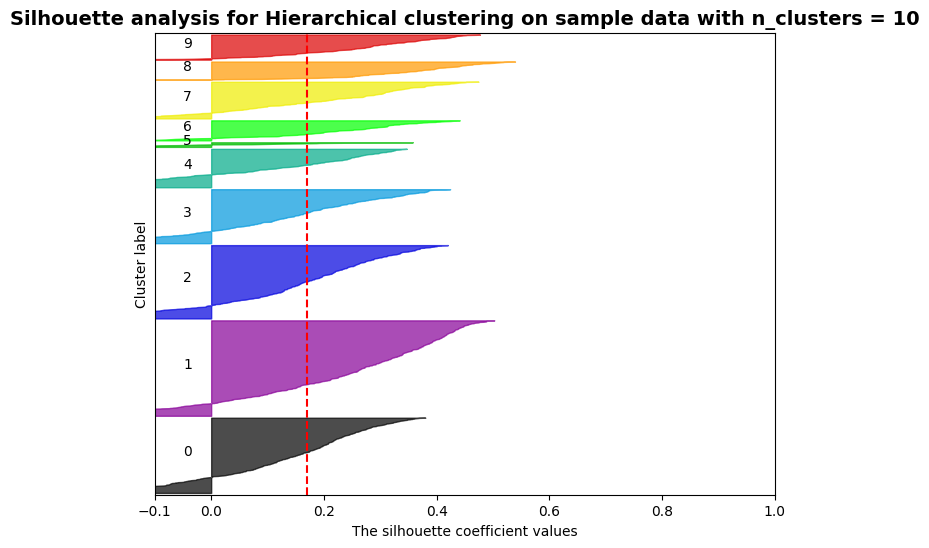

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = range(2, 11) 

data = X_scaled_df

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.set_xlim([-0.1, 1])
   
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    
  
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  ### TO COMPLETE
    
    cluster_labels = clusterer.fit_predict(data)  ### TO COMPLETE
    

    silhouette_avg = silhouette_score(data, cluster_labels)  ### TO COMPLETE
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(data, cluster_labels)  ### TO COMPLETE
    
    y_lower = 10
    for i in range(n_clusters):
     
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.title(("Silhouette analysis for Hierarchical clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    plt.show()

What is, in your opinion, the best number of centers to choose?

2

Apply hierarchical clustering again with the optimal number of centers.

In [41]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

optimal_n_clusters = 2

model = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
cluster_labels = model.fit_predict(data)

How many samples are in each cluster?

In [42]:
(unique, counts) = np.unique(cluster_labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print("Samples in each cluster:", cluster_distribution.items())

Samples in each cluster: dict_items([(0, 1392), (1, 1108)])


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [43]:
# Compute contingency matrix
contingency = confusion_matrix(y_encoded, cluster_labels)

# Display in a readable DataFrame
contingency_df = pd.DataFrame(
    contingency,
    index=[f"True Class {i}" for i in np.unique(y_encoded)],
    columns=[f"Cluster {i}" for i in np.unique(cluster_labels)]
)

print("Contingency Matrix for Hierarchical Clustering:")
display(contingency_df)

Contingency Matrix for Hierarchical Clustering:


,Cluster 0,Cluster 1
True Class 0,314,986
True Class 1,1078,122


2- Discuss the obtained matrix.

### 🧩 Contingency Matrix Analysis (Hierarchical Clustering)

| True Class | Cluster 0 | Cluster 1 |
|-------------|------------|------------|
| **Class 0** | 314 | **986** |
| **Class 1** | **1078** | 122 |

#### 🔹 Discussion
- The contingency matrix compares the **true labels** with the **predicted clusters** obtained from hierarchical (agglomerative) clustering.  
- Ideally, large values should appear along the diagonal, indicating that most samples from each true class fall into a single cluster.  
- In this case, the results are **swapped**:
  - Most of the **True Class 0** samples (986) were assigned to **Cluster 1**.
  - Most of the **True Class 1** samples (1078) were assigned to **Cluster 0**.

#### ✅ Conclusion
The model correctly identified two distinct groups, but the **cluster labels are inverted** —  
**Cluster 0 corresponds to True Class 1**, and **Cluster 1 corresponds to True Class 0**.  
This label inversion is common in clustering since cluster IDs are arbitrary.


With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [44]:
from sklearn.metrics import (
    rand_score,
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

# True labels (ground truth)
y_true = y_encoded  

# Predicted cluster labels from hierarchical clustering
y_pred = cluster_labels  

# Compute all metrics
rand_index = rand_score(y_true, y_pred)
adjusted_rand = adjusted_rand_score(y_true, y_pred)
homogeneity = homogeneity_score(y_true, y_pred)
completeness = completeness_score(y_true, y_pred)
v_measure = v_measure_score(y_true, y_pred)

# Display results
print("🔹 Clustering Evaluation Metrics (Hierarchical Clustering):")
print(f"Rand Index:              {rand_index:.4f}")
print(f"Adjusted Rand Index:     {adjusted_rand:.4f}")
print(f"Homogeneity Score:       {homogeneity:.4f}")
print(f"Completeness Score:      {completeness:.4f}")
print(f"V-measure:               {v_measure:.4f}")

🔹 Clustering Evaluation Metrics (Hierarchical Clustering):
Rand Index:              0.7119
Adjusted Rand Index:     0.4238
Homogeneity Score:       0.3487
Completeness Score:      0.3516
V-measure:               0.3501


4- Discuss the obtained scores.

# Clustering Evaluation Metrics

## Rand Index
**Value:** 0.7119  
**Interpretation:** Fairly high — about 71% of sample pairs were assigned consistently between true labels and predicted clusters. This indicates **moderate similarity** between the clustering and the true class structure.

## Adjusted Rand Index
**Value:** 0.4238  
**Interpretation:** After correcting for chance, this score shows a **moderate level of agreement**. A value of 1 would mean perfect alignment, and 0 would mean random clustering — so 0.42 suggests the clustering captured **some real structure** but not perfectly.

## Homogeneity
**Value:** 0.3487  
**Interpretation:** Each cluster contains mostly samples from a single true class, but some **mixing between classes still exists**.

## Completeness
**Value:** 0.3516  
**Interpretation:** Most members of a true class tend to fall into the same cluster, but **some classes are split across multiple clusters**.

## V-measure
**Value:** 0.3501  
**Interpretation:** The harmonic mean of homogeneity and completeness — roughly **35% balance** between cluster purity and class grouping consistency.


OPTIONAL: plot the dendrogram

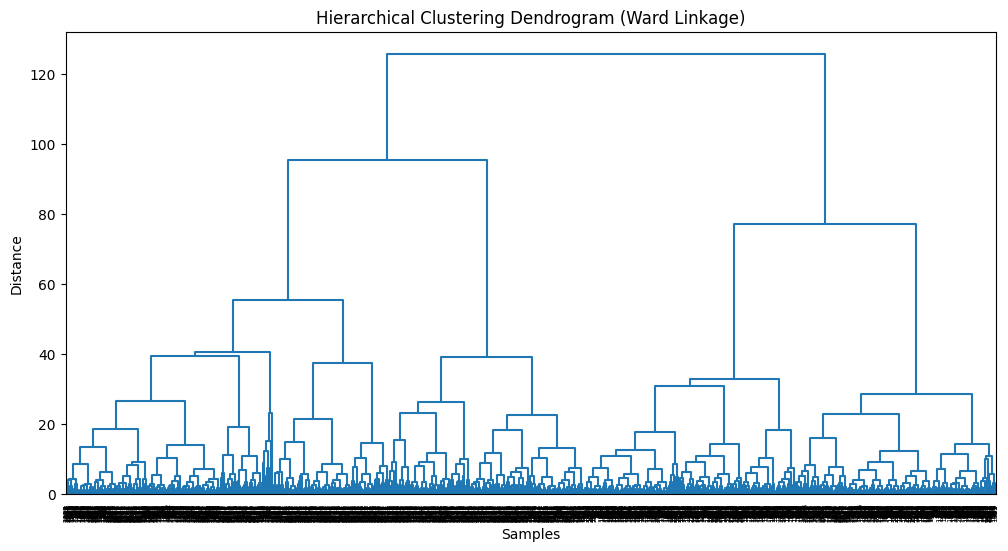

In [45]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
linked = linkage(X_scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    color_threshold=0  # optional: draws all in one color unless you set a cut-off
)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## TD3 (part II): Spectral clustering and comparison

### Clustering algorithm 3: Spectral clustering

Apply the spectral clustering algorithm with 2 centers.

In [46]:
spectral_rbf = SpectralClustering(
    n_clusters=2,
    affinity='rbf',
    random_state=42,
)
y_pred_rbf = spectral_rbf.fit_predict(X_scaled)

In [47]:
y_pred_rbf[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

How many samples are in each cluster?

In [48]:
cluster_counts_rbf = pd.Series(y_pred_rbf).value_counts()
print("Cluster counts (affinity='rbf'):\n", cluster_counts_rbf)

Cluster counts (affinity='rbf'):
 0    2499
1       1
Name: count, dtype: int64


Apply the spectral clustering algorithm again. This time, change the method to construct the affinity matrix to "nearest_neighbors".

In [49]:
spectral_nn = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    random_state=42
)
y_pred_nn = spectral_nn.fit_predict(X_scaled)

In [50]:
y_pred_nn[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

How many samples are in each cluster?

In [51]:
cluster_counts_nn = pd.Series(y_pred_nn).value_counts()
print("Cluster counts (affinity='nearest_neighbors'):\n", cluster_counts_nn)

Cluster counts (affinity='nearest_neighbors'):
 1    1291
0    1209
Name: count, dtype: int64


Compare the two results. Is the method used to construct the affinity matrix important? Which one gave you the best result? For the rest of this section, use the best method.

In [52]:
score_rbf = silhouette_score(X_scaled, y_pred_rbf)
score_nn = silhouette_score(X_scaled, y_pred_nn)
print(f"Silhouette Score ('rbf'): {score_rbf:.4f}")
print(f"Silhouette Score ('nearest_neighbors'): {score_nn:.4f}")

Silhouette Score ('rbf'): 0.7939
Silhouette Score ('nearest_neighbors'): 0.2942


- 'RBF' affinity produced one very large and one very small clusters while 'nearest-neighbors' affinity clusters are balanced. while RBF silhouette score is higher, clusters are extremely imbalanced and result is misleading. i additionally checked the result with lower gamma for RBF which resulted more balanced clusters, though the task asks for default behavior. affinity method strongly affects the result, nearest-neighbors produces more meaningful clusters, therefore i will use this method.

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.29419175663268454
For n_clusters = 3 The average silhouette_score is : 0.27099393573568487
For n_clusters = 4 The average silhouette_score is : 0.24750403556069178
For n_clusters = 5 The average silhouette_score is : 0.2237228992518239
For n_clusters = 6 The average silhouette_score is : 0.20337667479104182
For n_clusters = 7 The average silhouette_score is : 0.21626267347787734
For n_clusters = 8 The average silhouette_score is : 0.2013700577622325
For n_clusters = 9 The average silhouette_score is : 0.193054933404385
For n_clusters = 10 The average silhouette_score is : 0.1885206703346494


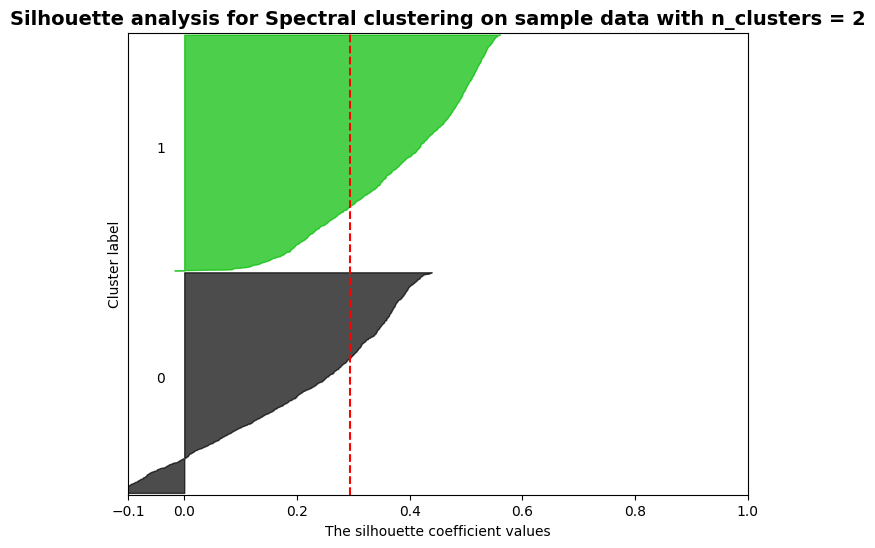

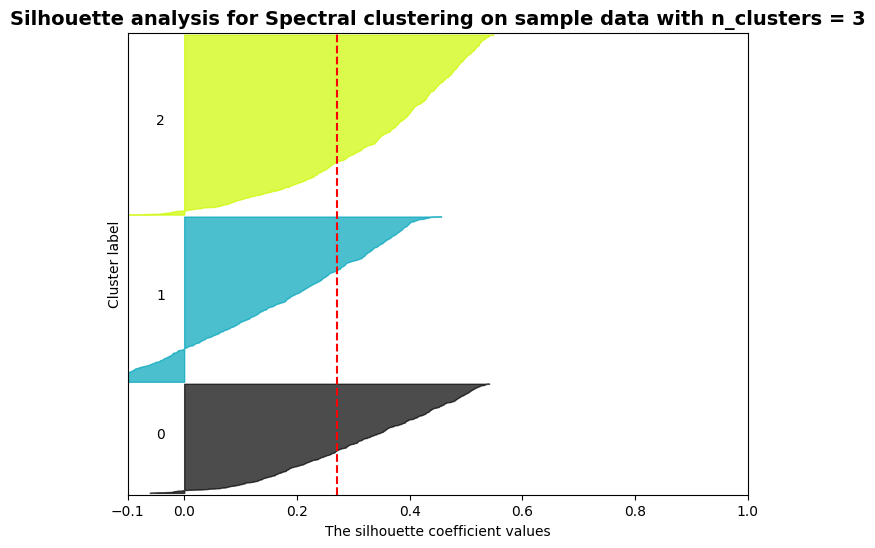

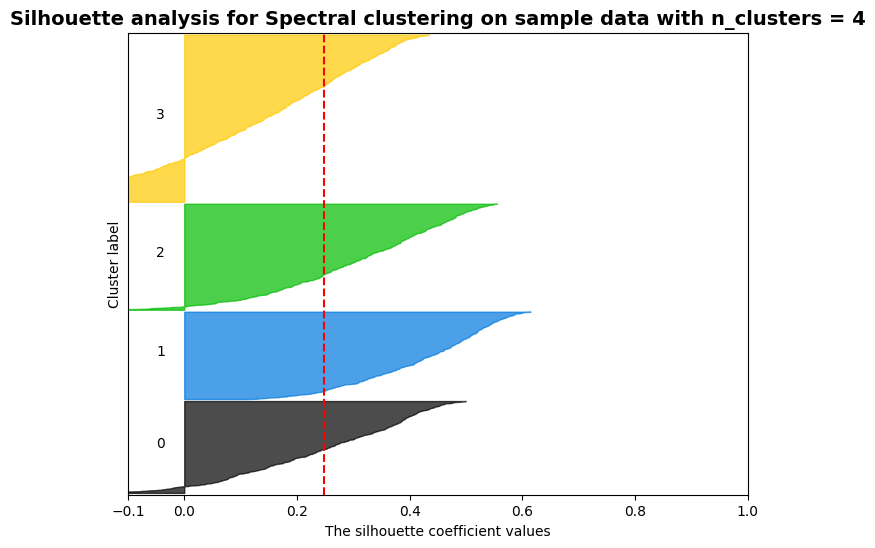

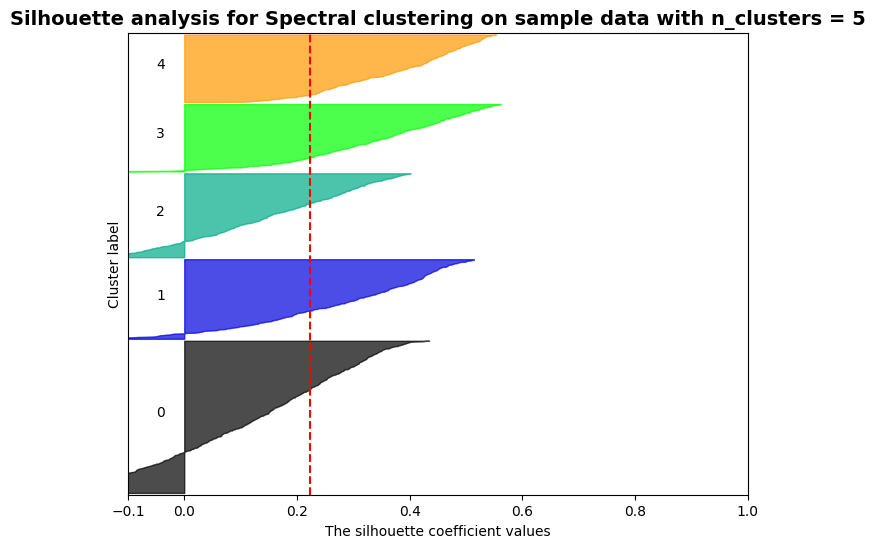

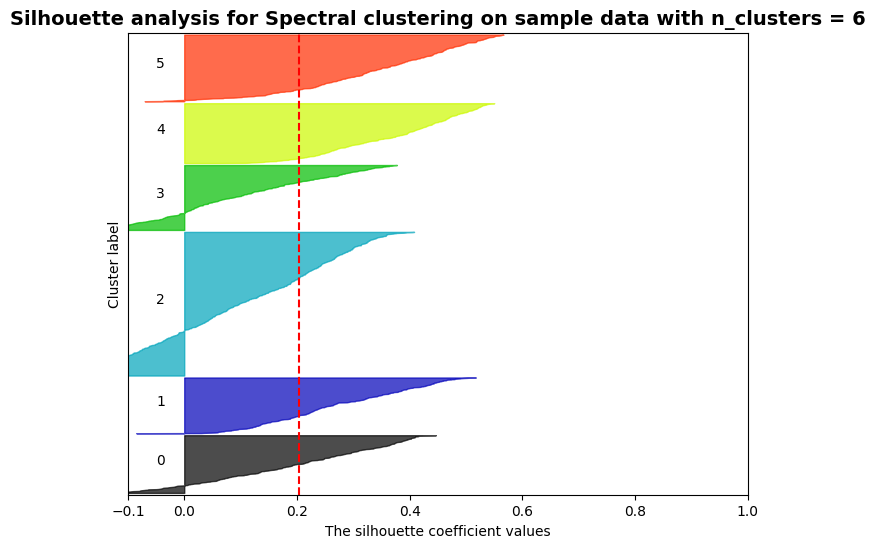

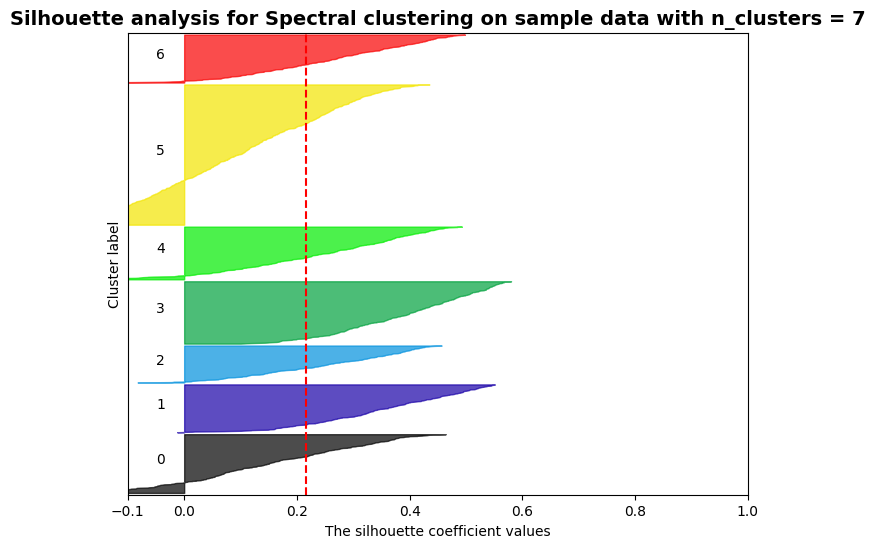

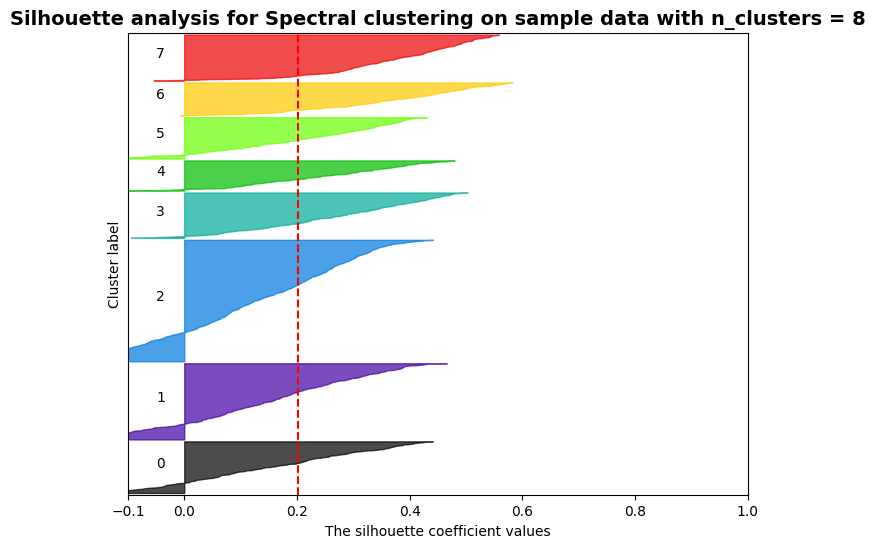

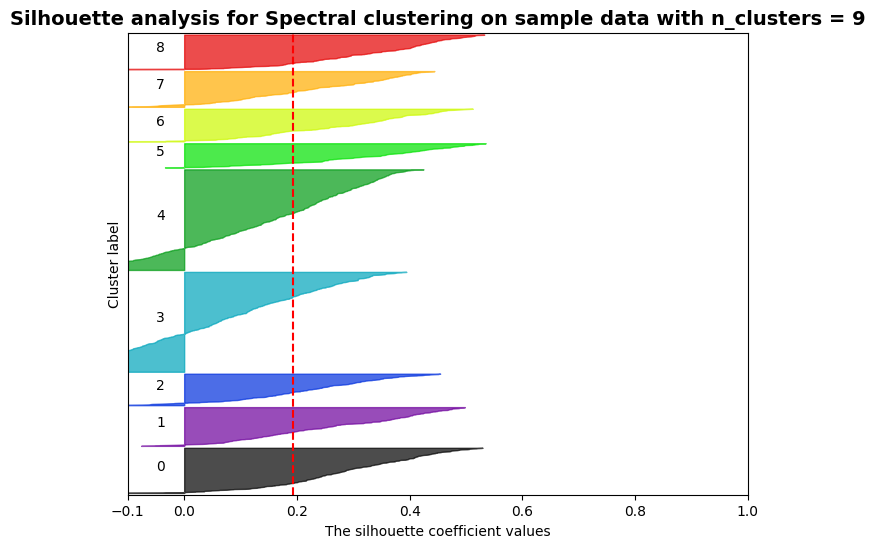

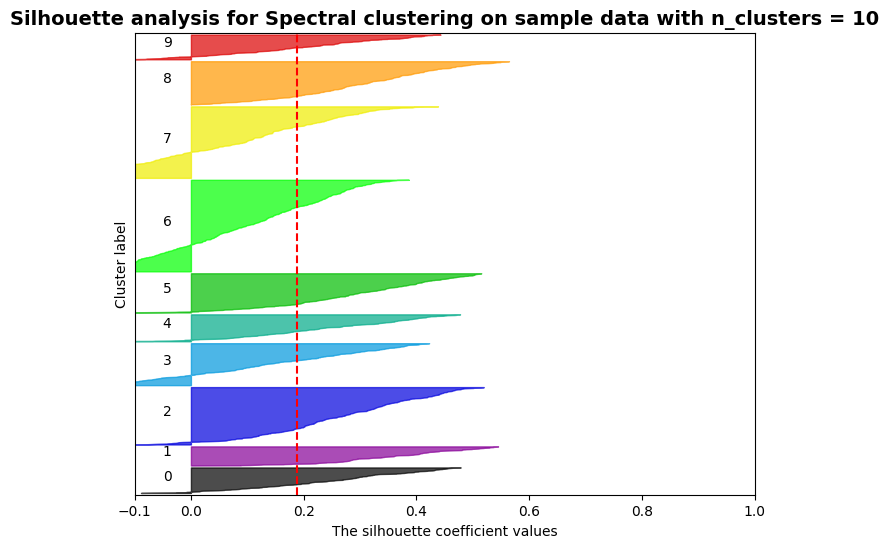

In [53]:
range_n_clusters = range(2, 11)

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

data = X_scaled

for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters. Make sure you use the "affinity"
    # method that gave you the best results.
    clusterer = SpectralClustering(
        n_clusters=n_clusters,
        affinity='nearest_neighbors',
        random_state=42
    )
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Spectral clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

What is, in your opinion, the best number of centers to choose?

- best number of centers is 2, since it gives the highest silhouette score (≈2.9)

Apply spectral clustering again with the optimal number of centers.

In [54]:
spectral_opt = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    random_state=42
)
labels_opt = spectral_opt.fit_predict(X_scaled)

How many samples are in each cluster?

In [55]:
pd.Series(labels_opt).value_counts()

1    1291
0    1209
Name: count, dtype: int64

Since, the true label of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [56]:
from sklearn.metrics.cluster import contingency_matrix

contingency = contingency_matrix(y_encoded, labels_opt)

contingency_df = pd.DataFrame(
    contingency,
    index=[f"True Class {i}" for i in np.unique(y_encoded)],
    columns=[f"Cluster {i}" for i in np.unique(labels_opt)]
)

display(contingency_df)

,Cluster 0,Cluster 1
True Class 0,260,1040
True Class 1,949,251


2- Discuss the obtained matrix.

- rows of matrix represent the classes (from the dataset labels) and columns - the clusters asssigned by the algorithm. clustering, as seen in matrix, did not perfectly separate the classes, both clusters contain the mix of two seed types. first class has 260 samples in cluster 0 and 1040 in cluster 1, while the second class shows the opposite result, 949 vs 251. judging by the result it can be said that algorithm captures some structure but the separation is not clean, there's an overlap between the labels and assigned clusters. it does not align well with actual seed types.


With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [57]:
rand = rand_score(y_encoded, labels_opt)
print(f"Rand Index: {rand:.4f}")

Rand Index: 0.6746


In [58]:
adj_rand = adjusted_rand_score(y_encoded, labels_opt)
print(f"Adjusted Rand Index: {adj_rand:.4f}")

Adjusted Rand Index: 0.3493


In [59]:
homo = homogeneity_score(y_encoded, labels_opt)
print(f"Homogeneity Score: {homo:.4f}")

Homogeneity Score: 0.2690


In [60]:
compl = completeness_score(y_encoded, labels_opt)
print(f"Completeness Score: {compl:.4f}")

Completeness Score: 0.2689


In [61]:
v_meas = v_measure_score(y_encoded, labels_opt)
print(f"V-measure: {v_meas:.4f}")

V-measure: 0.2689


4- Discuss the obtained scores.

- as seen in the results above, clustering shows moderate agreement with the true labels. homogenity, completeness and V-measure have low results, indicating that clusters are not pure or well separated according to the real seed types. algorithm identified a certain structure, judging by moderate values of RI and ARI but overlap between classes stays large. the result suggests that seed types are not easily separable according to the given feature or that a different clustering approach may perform better.

### Conclusion

In your opinion, which method gave the better results for this dataset?

- among the three used methods hierarchical clustering achieved the best results. it obtained highers RI (0.7119) and ARI (0.4238), additionally best scores in homogenity, completeness and V-meassure. this result shows that clusters produced by this method were better aligned with the true seed types, compared to other two method. in contrast K-means and spectral clustering shower almost similar but slightly lower results. while spectral clustering have more advanced graph based logic, it did not perform well on this dataset, probably because the structure of data was not strongly non linear, so the benefit of graph based affinity was limited.

Usually, when we apply different clustering methods, it's because we do not know the classes. In such situation, we compare the different clustering models we obtained with each method to each other to see if they are corroborating.
<br>
Pick two of the three clustering methods used above, and use the same metrics as before to compare them (do not rerun the models, just compare the predicted clusters you obtained with each method).  

In [62]:
print("Rand Index:", rand_score(y_pred, labels_opt))

Rand Index: 0.6607222088835534


In [63]:
print("Adjusted Rand Index:", adjusted_rand_score(y_pred, labels_opt))

Adjusted Rand Index: 0.32143867841584894


In [64]:
print("Homogeneity:", homogeneity_score(y_pred, labels_opt))

Homogeneity: 0.2584884136872444


In [65]:
print("Completeness:", completeness_score(y_pred, labels_opt))

Completeness: 0.25627587252992035


In [66]:
print("V-measure:", v_measure_score(y_pred, labels_opt))

V-measure: 0.257377388176564


Discuss the obtained scores.

- after comparison of hierarchical and spectral clustering methods we can see high results, meaning that the methods produced very similar partitions of the dataset. while algorithms use different principles both seem to find the same structure in the data. ARI shows strong alignment, meaning that both methods defined boundaries between clusters similarly. high scores of homogenity and completeness confirm that each cluster identified by one method is internally consistent relatively to the other, and that majority of the samples that were together in one model were grouped together in other too.

At the beginning of the practical, you noticed the number of classes in the data. After completing all the work, applying silhouette and finding the optimal number of clusters, were you expecting the results you obtained? Can you find an explanation for the result?

- we knew that the dataset had two true classes and silhouette analysis also indicated that two clusters are optimal for all three methods. unsupervised methods confirmed the expected outcome, though clustering quality was quite moderate for all methods. such outcome shows that data truly can be divided into two groups, but the boundary between them is not clear in the features space. classes may overlap and share similar characteristics, leading to mixed clusters. also it is possible that used features did not capture the underlying class distinction well, limiting the performance of the clustering. in the end it can be said that dataset probably contains continuous variation rather than discrete groups and that classes are not perfectly separable using geometric features alone.

done